# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.font_manager import FontProperties
warnings.filterwarnings("ignore")

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN

# 1. import data

In [2]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [5]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
# 取4個連續型變數特徵
features = ['Age', 'Education', 'Income', 'Settlement size']
X = df[features]

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
X.head()

,Age,Education,Income,Settlement size
0,67,2,124670,2
1,22,1,150773,2
2,49,1,89210,0
3,45,1,171565,1
4,53,1,149031,1


In [8]:
# 顯示各特徵的平均與標準差
X_stats = X.describe().loc[['mean', 'std']]
X_stats.round(2)

,Age,Education,Income,Settlement size
mean,35.91,1.04,120954.42,0.74
std,11.72,0.60,38108.82,0.81


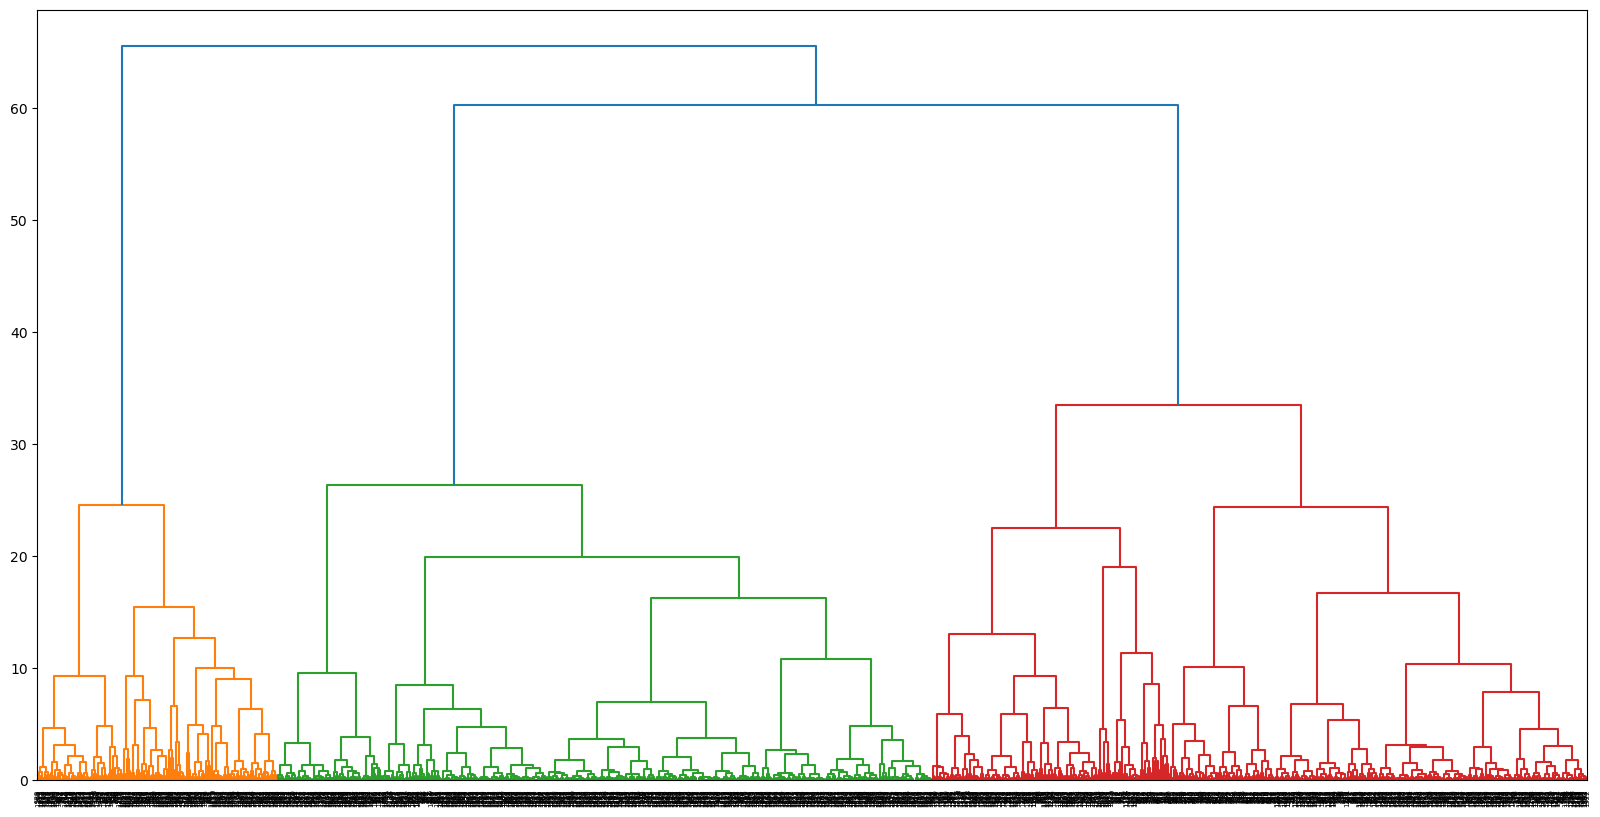

In [9]:
data_scaled=pd.DataFrame(X_std,columns=X.columns)

# Ward method
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# PCA

In [10]:
# 前3大主成分各自解釋數值的變異
pca_4d = PCA(4, random_state=123)
pca_4d.fit(X_std)
np.round(pca_4d.explained_variance_ratio_, 2)

array([0.49, 0.31, 0.12, 0.08])

In [11]:
sum(pca_4d.explained_variance_ratio_.tolist()[:2]) # 前2大主成分就已解釋了數值中約8成的差異

0.7988783305450597

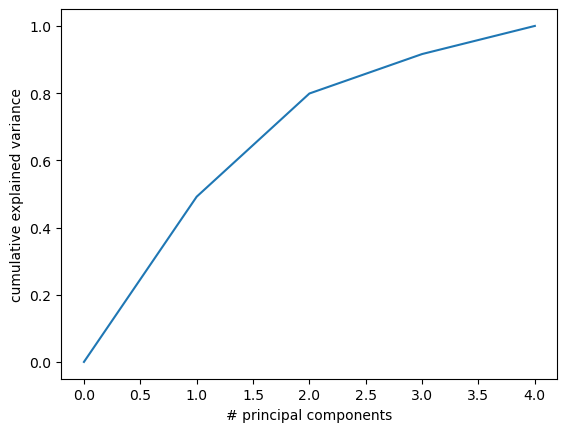

In [12]:
# 計算累積解釋量 (加上 0 是為了讓圖從座標原點開始)
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_4d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [13]:

pca = PCA(n_components=2, random_state=123)

# 對標準化後的特徵做PCA
# 將標準化後的數據進行降維轉換
X_pca = pca.fit_transform(X_std)


In [14]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=X.columns)
df_pc.index = [f"{c}" for c in[' factor1 ', ' factor2 ']] 
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")


,Age,Education,Income,Settlement size
factor1,0.58,0.53,0.51,0.35
factor2,-0.36,-0.47,0.44,0.68


In [15]:
from sklearn.cluster import KMeans

# 使用降維後的資料進行分群）
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=123)
df['Cluster'] = kmeans_3.fit(X_pca).labels_

# 計算各群體的特徵平均值 (以便貼標)
analysis_features = ['Age', 'Education', 'Income', 'Settlement size']
cluster_characteristics = df.groupby('Cluster')[analysis_features].mean()

# 顯示各群特徵平均值
print("--- 三個分群的特徵平均值 ---")
print(cluster_characteristics.round(2))

# 顯示各群人數佔比
counts = df['Cluster'].value_counts(normalize=True).sort_index() * 100
print("\n--- 各群人數佔比 (%) ---")
print(counts.round(2))


--- 三個分群的特徵平均值 ---
           Age  Education     Income  Settlement size
Cluster                                              
0        31.01       0.86   98133.60             0.13
1        33.72       0.80  140262.75             1.52
2        54.61       2.05  147581.95             0.91

--- 各群人數佔比 (%) ---
Cluster
0    48.75
1    34.45
2    16.80
Name: proportion, dtype: float64


In [17]:

# Cluster 0 = 小資族
# Cluster 1 = 都市中堅份子
# Cluster 2 = 中生代菁英階層

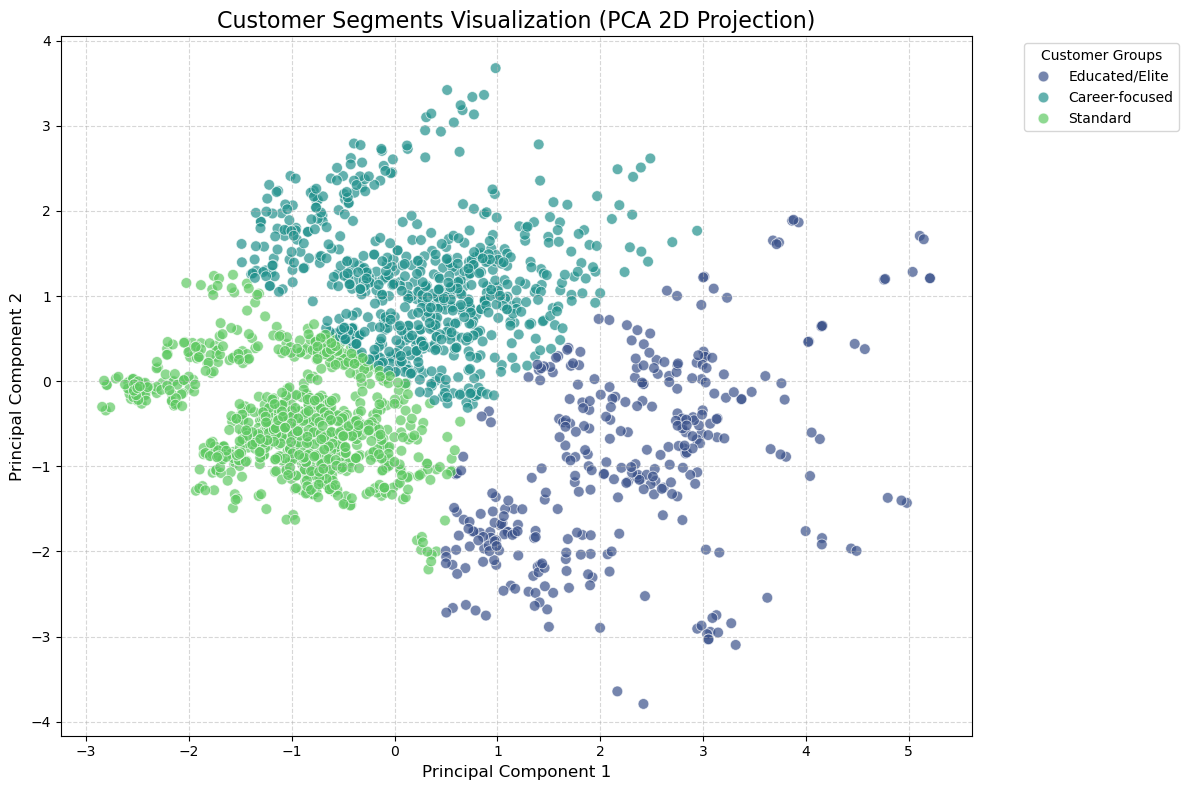

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 準備繪圖數據：將 PCA 的兩個主成分轉換為 DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_3.labels_

# 2. 為群體命名（選用，讓圖表更好懂）
cluster_map = {0: 'Standard', 1: 'Career-focused', 2: 'Educated/Elite'}
df_pca['Segment'] = df_pca['Cluster'].map(cluster_map)

# 3. 開始繪圖
plt.figure(figsize=(12, 8))

# 使用 Seaborn 繪製散佈圖
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=df_pca, 
                palette='viridis', s=60, alpha=0.7, edgecolor='w')


# 5. 圖表修飾
plt.title('Customer Segments Visualization (PCA 2D Projection)', fontsize=16)
plt.xlabel(f'Principal Component 1', fontsize=12)
plt.ylabel(f'Principal Component 2', fontsize=12)
plt.legend(title='Customer Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()